Here we decribe how to use cEBMF with a custom  prior


Step 1: Define a Custom Prior Function
 

    Take X, betahat, sebetahat, and model_param as inputs.
    
    Return a PriorResult object (which contains .post_mean, .post_mean2, .loss, and .model_param).

Below a naive example generated via GPT
Compute posterior mean and variance based on a simple Bayesian update.

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
def my_custom_prior(X, betahat, sebetahat, model_param):
    """
    A simple custom prior function for demonstration.
    
    - Assumes a Gaussian prior with mean 0 and variance 1.
    - Uses a standard Bayesian update to compute the posterior.

    Parameters:
    - X: Covariates (not used in this simple example).
    - betahat: Observed effect estimates.
    - sebetahat: Standard errors of betahat.
    - model_param: Model parameters (not used here).

    Returns:
    - PriorResult object with post_mean, post_mean2, loss, and model_param.
    """

    # Simple Bayesian posterior update assuming Gaussian prior
    prior_mean = 0
    prior_var = 1  # Prior variance

    posterior_var = 1 / (1 / prior_var + 1 / sebetahat**2)
    posterior_mean = posterior_var * (prior_mean / prior_var + betahat / sebetahat**2)

    # Compute posterior second moment (E[theta^2])
    post_mean2 = posterior_var + posterior_mean**2

    # Dummy loss (not really used for this example)
    loss = np.sum((betahat - posterior_mean)**2)

    return PriorResult(post_mean=posterior_mean, post_mean2=post_mean2, log_lik=-loss)


In [4]:
# Generate synthetic data
np.random.seed(42)
N, P = 50, 30  # Matrix dimensions
true_K = 5  # Number of true factors

# Create a low-rank matrix L @ F'
true_L = np.random.randn(N, true_K)
true_F = np.random.randn(P, true_K)
Y = true_L @ true_F.T + np.random.randn(N, P) * 0.1  # Add some noise


In [5]:
# Initialize the cEBMF model with a custom prior for L
ebmf = cEBMF(data=Y, K=5, prior_L=my_custom_prior, prior_F="norm")

# Initialize factors
ebmf.init_LF()

# Run multiple iterations
for i in range(50):
    ebmf.iter()

# Print final factor matrices
print("Learned L matrix:")
print(ebmf.L)

print("\nLearned F matrix:")
print(ebmf.F)


Learned L matrix:
[[-0.60958064  0.746022    1.6817462  -1.1198523  -0.187282  ]
 [-1.9499727  -0.4235448   0.56339747  0.86948955 -0.563917  ]
 [ 2.1332428   0.12717284  0.2979037   1.6733191   0.8358868 ]
 [ 1.8442827   0.33968693  0.6332076   0.7077116   1.1096287 ]
 [ 1.8955008  -1.2064508   0.37512994  0.75628686 -0.7761075 ]
 [ 1.3617381  -0.8121241   0.68506557  0.0152251   0.6891069 ]
 [-1.8701243  -0.43843305 -1.0580943   1.3280759  -0.639041  ]
 [ 0.8624438   0.3464905  -3.8449154   1.1613811   0.29073432]
 [ 1.3288583   0.9510803   0.49561158  0.49840233 -0.5779007 ]
 [ 0.45966184  1.4835061   2.1002178   0.21198682  1.1207855 ]
 [-0.1325615  -0.4889433  -1.0171773  -0.8908546  -0.21550657]
 [ 0.5637158  -1.2105744  -0.23150134 -1.020381   -0.26264718]
 [ 0.61789924 -0.9199849  -2.4581225   0.6074162   0.19590311]
 [ 0.35394508 -0.2120251   2.3192124  -0.36018062 -0.6238682 ]
 [-0.33730716  3.850969    1.1662544   0.2185012  -1.1402876 ]
 [ 1.6359863   1.62996     0.51688737

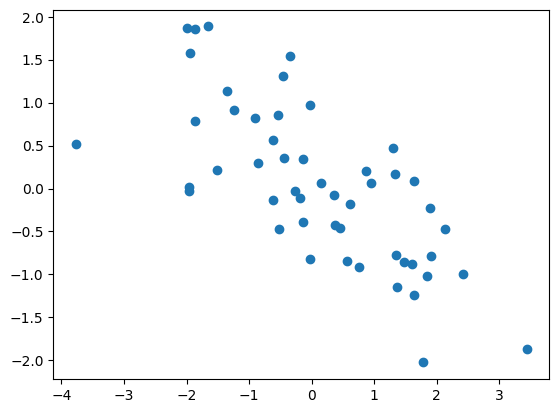

In [6]:
plt.scatter(ebmf.L[:,0], true_L[:,1])